In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 128 entries, Province/State to 5/24/20
dtypes: float64(2), int64(124), object(2)
memory usage: 266.1+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 128 entries, Province/State to 5/24/20
dtypes: float64(2), int64(124), object(2)
memory usage: 266.1+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


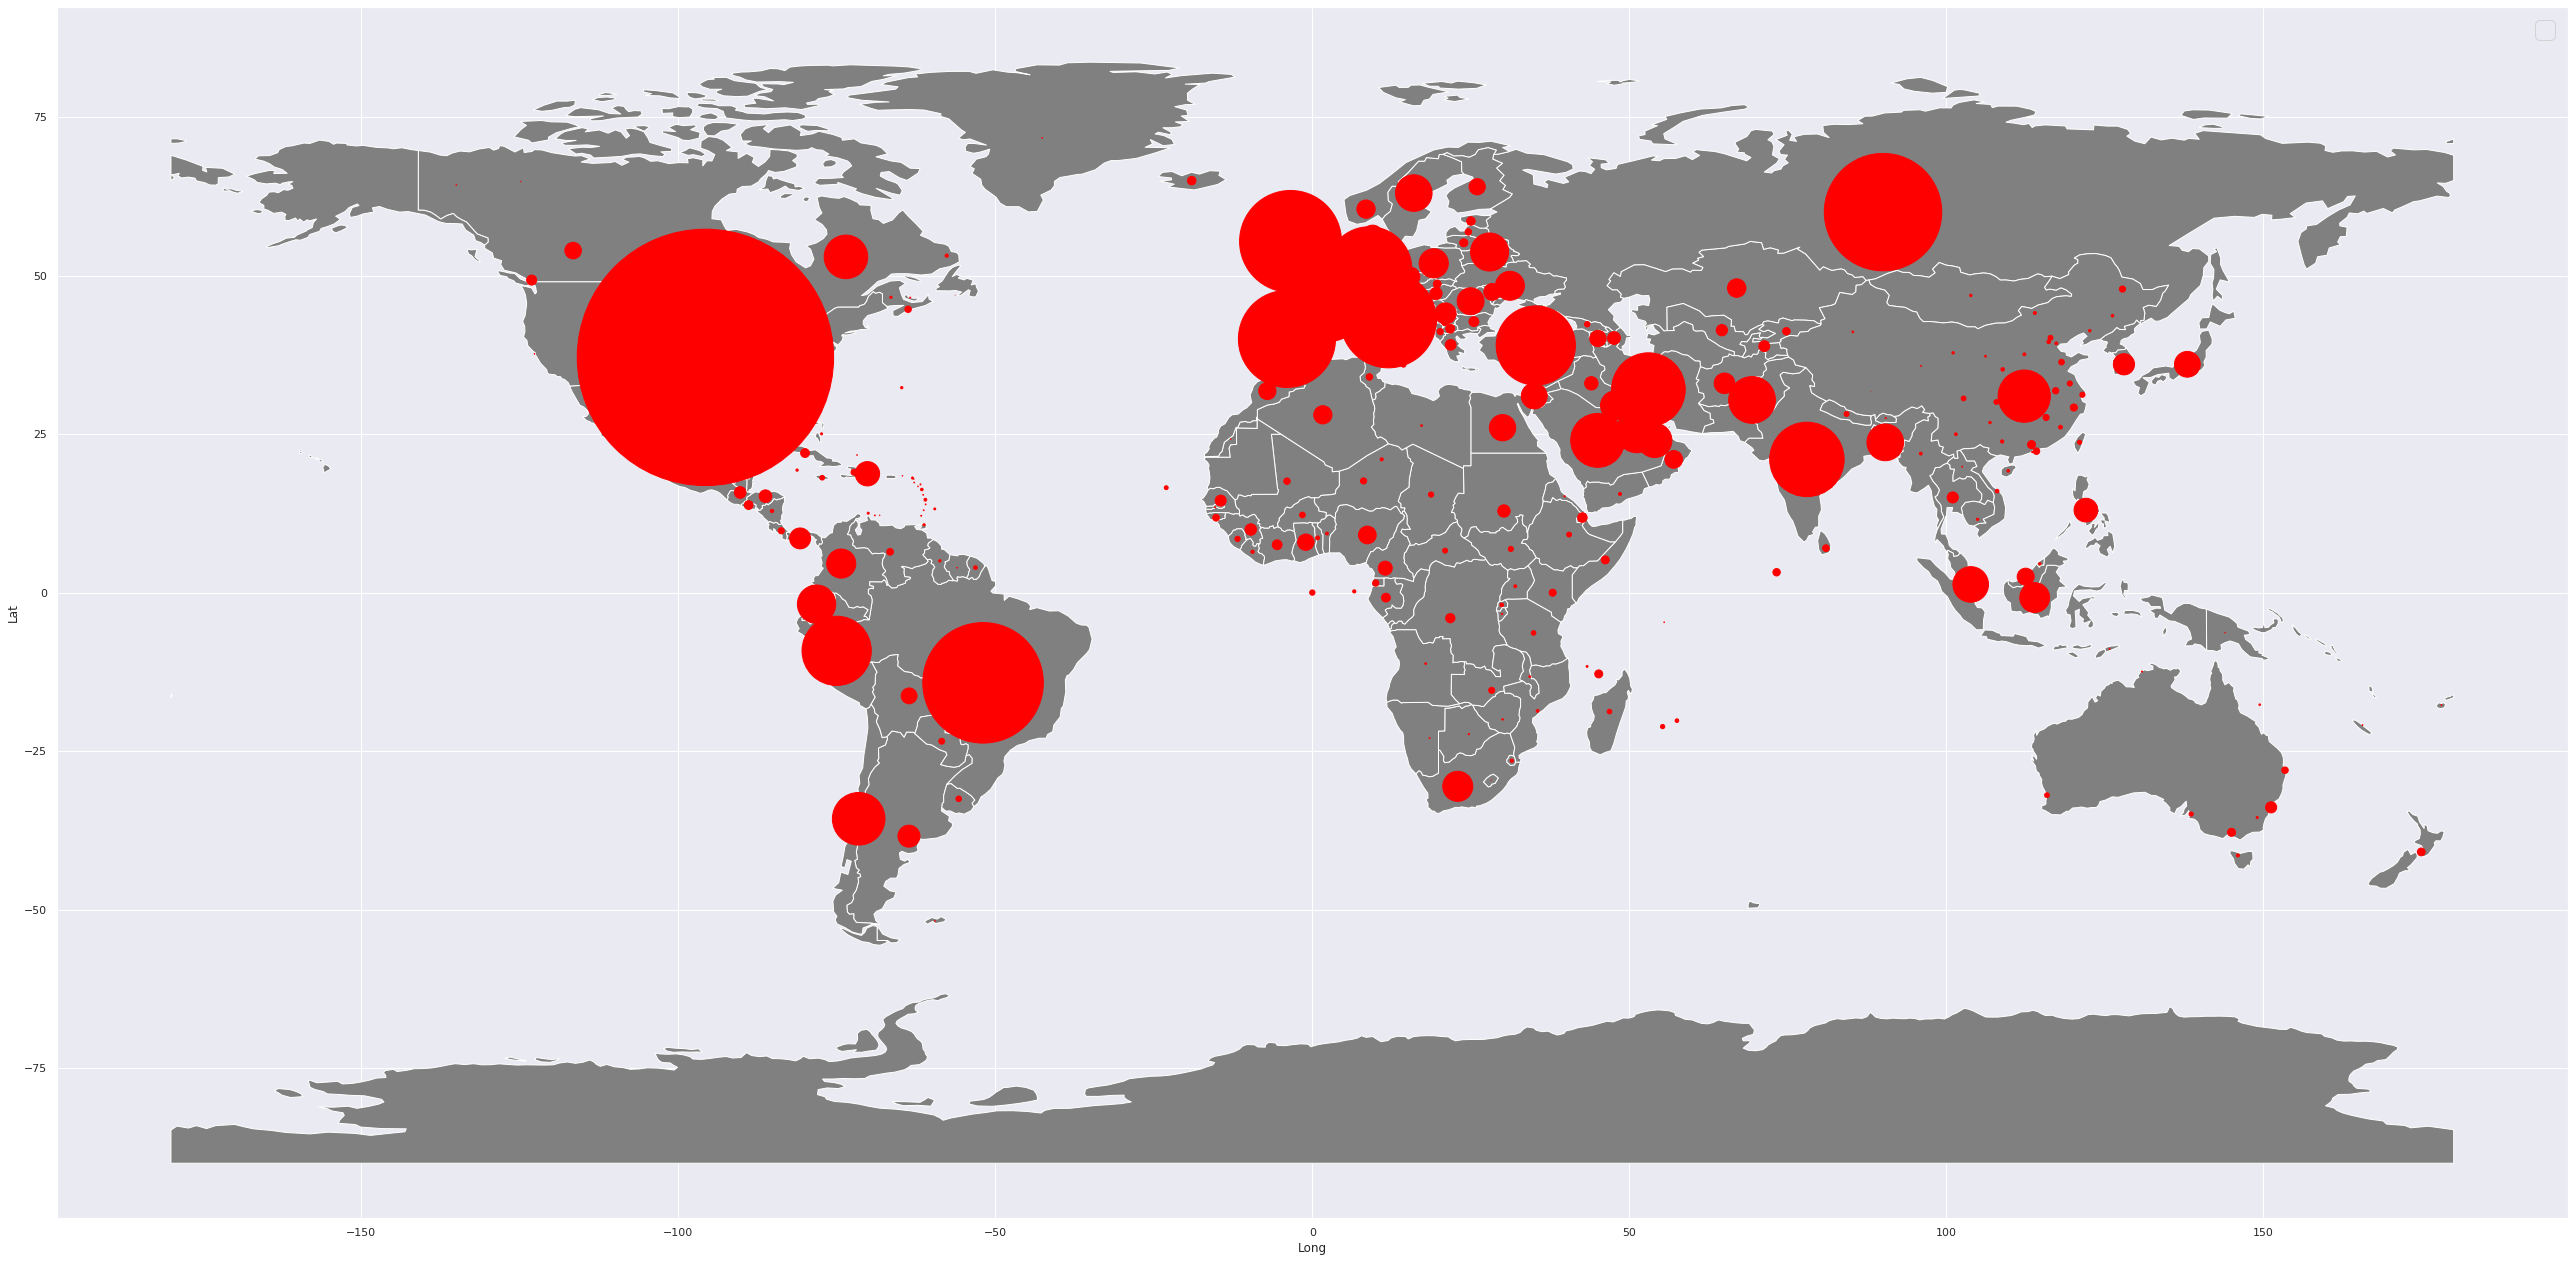

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,582,294312,132282,150376,156966,79310,116683,10135,63472,588
5/21/20,592,298418,134560,150376,158087,79310,125960,10162,63976,594
5/22/20,600,350135,136720,150376,159064,79332,135430,10194,63986,603
5/23/20,607,361239,138840,150376,159716,79335,142587,10213,63988,616


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,897,9977,2265,254,1571,2955,13477,529,116,1900
5/21/20,903,10116,2512,279,1640,3204,13657,534,116,1908
5/22/20,911,10267,2743,279,1725,3477,13989,544,116,1916
5/23/20,918,10577,3054,279,1819,3477,14422,550,116,1931


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,10,287,45,17,31,147,446,9,8,79
5/21/20,10,291,48,17,33,156,448,9,8,80
5/22/20,10,295,51,17,33,167,456,9,8,81
5/23/20,10,299,55,17,33,167,458,9,8,81


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,897,9977,2265,254,1571,2955,13477,529,116,1900
5/21/20,903,10116,2512,279,1640,3204,13657,534,116,1908
5/22/20,911,10267,2743,279,1725,3477,13989,544,116,1916
5/23/20,918,10577,3054,279,1819,3477,14422,550,116,1931


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,10,287,45,17,31,147,446,9,8,79
5/21/20,10,291,48,17,33,156,448,9,8,80
5/22/20,10,295,51,17,33,167,456,9,8,81
5/23/20,10,299,55,17,33,167,458,9,8,81


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/20/20,1.017007,1.011148,1.061885,1.000000,1.048732,1.000000,1.019209,1.017308,1.0,1.006889
5/21/20,1.006689,1.013932,1.109051,1.098425,1.043921,1.084264,1.013356,1.009452,1.0,1.004211
5/22/20,1.008859,1.014927,1.091959,1.000000,1.051829,1.085206,1.024310,1.018727,1.0,1.004193
5/23/20,1.007684,1.030194,1.113380,1.000000,1.054493,1.000000,1.030953,1.011029,1.0,1.007829


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,96,96,96,96,97,97,97,100,100,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,86,88,88,90,90,90,90,92,92,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1037,1040,1043,1044,1045,1046,1048,1049,1050,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,14939,15574,16295,16935,17687,18330,19131,20177,21175,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,853,863,866,882,897,903,911,918,930,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,1862,1872,1881,1887,1900,1908,1916,1931,1941,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,12110,12314,12725,13223,13477,13657,13989,14422,14801,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,1265,1338,1413,1498,1571,1640,1725,1819,1915,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,197,197,210,218,237,249,261,279,328,POINT (-53.12580 3.93390)


In [37]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [38]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,96,96,96,96,97,97,97,100,100,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,86,88,88,90,90,90,90,92,92,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,853,863,866,882,897,903,911,918,930,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,1862,1872,1881,1887,1900,1908,1916,1931,1941,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,12110,12314,12725,13223,13477,13657,13989,14422,14801,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,1265,1338,1413,1498,1571,1640,1725,1819,1915,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,197,197,210,218,237,249,261,279,328,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,39,39,39,39,40,40,40,40,40,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,1763,1763,1912,2133,2265,2512,2743,3054,3424,POINT (-90.23080 15.78350)


In [39]:
len(temp)

21

In [40]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [41]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'5/23/20'

In [42]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [44]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [45]:
cases_camcar_all

,Province/State,Country/Region,5/23/20,5/24/20
0,NaN,Dominican Republic,14422,14801
1,NaN,Panama,10577,10926
2,NaN,Honduras,3477,3950
3,NaN,Guatemala,3054,3424
4,NaN,Cuba,1931,1941
5,NaN,El Salvador,1819,1915
6,NaN,Costa Rica,918,930
7,NaN,Haiti,865,865
8,NaN,Jamaica,550,552
9,French Guiana,France,279,328


In [46]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [47]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [48]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [49]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,55,55,55,55,56,57,58,58,58,58
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,546,562,574,592,613,630,652,682,705,727
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,9,10,10,10,10,10,10,10,10,10
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,79,79,79,79,79,79,80,81,81,82
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,424,428,428,434,441,446,448,456,458,458
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,25,26,30,30,30,31,33,33,33,35
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [51]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [52]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,9,10,10,10,10,10,10,10,10,10
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,79,79,79,79,79,79,80,81,81,82
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,424,428,428,434,441,446,448,456,458,458
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,25,26,30,30,30,31,33,33,33,35
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,30,33,33,35,43,45,48,51,55,58


In [53]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [54]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'5/23/20'

In [55]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [56]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [57]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [58]:
deaths_camcar_all

,Province/State,Country/Region,5/23/20,5/24/20
0,NaN,Dominican Republic,458,458
1,NaN,Panama,299,306
2,NaN,Honduras,167,180
3,NaN,Cuba,81,82
4,NaN,Guatemala,55,58
5,NaN,El Salvador,33,35
6,NaN,Haiti,26,26
7,NaN,Nicaragua,17,17
8,Sint Maarten,Netherlands,15,15
9,NaN,Bahamas,11,11


In [59]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [60]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,41,42,42,43,43,43,44,44,45,45
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,65,67,68,68,68,70,70,70,70,70
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,3460,3587,3751,3903,4050,4256,4431,4575,4718,5016
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,542,551,565,575,577,582,592,600,607,620
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,1425,1460,1495,1505,1538,1573,1603,1631,1671,1689
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,15,15,16,16,16,16,16,16,16,16
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,3557,3726,5847,6613,6613,7142,7366,7572,7854,8133
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,417,441,464,474,502,537,544,570,570,633


In [61]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [62]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,41,42,42,43,43,43,44,44,45,45
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,65,67,68,68,68,70,70,70,70,70
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,542,551,565,575,577,582,592,600,607,620
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,1425,1460,1495,1505,1538,1573,1603,1631,1671,1689
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,3557,3726,5847,6613,6613,7142,7366,7572,7854,8133
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,417,441,464,474,502,537,544,570,570,633
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,124,125,125,131,136,136,137,141,143,145
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,30,30,30,30,30,33,33,33,33,33
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,135,138,138,138,155,159,222,222,244,258


In [63]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'5/23/20'

In [64]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,5/23/20,5/24/20
0,NaN,Dominican Republic,7854,8133
1,NaN,Panama,6279,6279
2,NaN,Cuba,1671,1689
3,NaN,El Salvador,570,633
4,NaN,Costa Rica,607,620
5,NaN,Honduras,439,468
6,NaN,Guatemala,244,258
7,NaN,Jamaica,200,211
8,NaN,Nicaragua,199,199
9,French Guiana,France,143,145


In [65]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [66]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [67]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [68]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
1,Bahamas,0,0,0,0,0,0,0,0,0,...,96,96,96,96,96,97,97,97,100,100
2,Barbados,0,0,0,0,0,0,0,0,0,...,85,86,88,88,90,90,90,90,92,92
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,843,853,863,866,882,897,903,911,918,930
4,Cuba,0,0,0,0,0,0,0,0,0,...,1840,1862,1872,1881,1887,1900,1908,1916,1931,1941
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,11739,12110,12314,12725,13223,13477,13657,13989,14422,14801
6,El Salvador,0,0,0,0,0,0,0,0,0,...,1210,1265,1338,1413,1498,1571,1640,1725,1819,1915
7,French Guiana,0,0,0,0,0,0,0,0,0,...,189,197,197,210,218,237,249,261,279,328
8,St Martin,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,40,40,40,40,40
9,Guatemala,0,0,0,0,0,0,0,0,0,...,1643,1763,1763,1912,2133,2265,2512,2743,3054,3424


In [69]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,9,10,10,10,10,10,10,10,10,10
4,Cuba,0,0,0,0,0,0,0,0,0,...,79,79,79,79,79,79,80,81,81,82
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,424,428,428,434,441,446,448,456,458,458
6,El Salvador,0,0,0,0,0,0,0,0,0,...,25,26,30,30,30,31,33,33,33,35
7,French Guiana,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,30,33,33,35,43,45,48,51,55,58


In [70]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
1,Bahamas,0,0,0,0,0,0,0,0,0,...,41,42,42,43,43,43,44,44,45,45
2,Barbados,0,0,0,0,0,0,0,0,0,...,65,67,68,68,68,70,70,70,70,70
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,542,551,565,575,577,582,592,600,607,620
4,Cuba,0,0,0,0,0,0,0,0,0,...,1425,1460,1495,1505,1538,1573,1603,1631,1671,1689
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,3557,3726,5847,6613,6613,7142,7366,7572,7854,8133
6,El Salvador,0,0,0,0,0,0,0,0,0,...,417,441,464,474,502,537,544,570,570,633
7,French Guiana,0,0,0,0,0,0,0,0,0,...,124,125,125,131,136,136,137,141,143,145
8,St Martin,0,0,0,0,0,0,0,0,0,...,30,30,30,30,30,33,33,33,33,33
9,Guatemala,0,0,0,0,0,0,0,0,0,...,135,138,138,138,155,159,222,222,244,258


In [71]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [72]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [73]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [74]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [75]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [76]:
cases_camcar_all.shape

(86, 21)

In [77]:
recovered_camcar_all.shape

(86, 21)

In [78]:
deaths_camcar_all.shape

(86, 21)

In [79]:
active_camcar_all.shape

(86, 21)